# Potential Energy Surfaces

# Potential Energy Surfaces before stable policy

Number of frames in trajectory: 201
Frame 0: Energy difference = 0.0000 eV
Frame 1: Energy difference = 254.6559 eV
Frame 2: Energy difference = 257.4625 eV
Frame 3: Energy difference = 327.9592 eV
Frame 4: Energy difference = 319.1927 eV
Frame 5: Energy difference = 319.9519 eV
Frame 6: Energy difference = 322.3937 eV
Frame 7: Energy difference = 326.6222 eV
Frame 8: Energy difference = 280.7135 eV
Frame 9: Energy difference = 283.6220 eV
Frame 10: Energy difference = 272.6359 eV
Frame 11: Energy difference = 275.6666 eV
Frame 12: Energy difference = 277.9709 eV
Frame 13: Energy difference = 277.6964 eV
Frame 14: Energy difference = 30.9702 eV
Frame 15: Energy difference = 31.3979 eV
Frame 16: Energy difference = 28.7762 eV
Frame 17: Energy difference = 500.1324 eV
Frame 18: Energy difference = 497.1723 eV
Frame 19: Energy difference = 499.9712 eV
Frame 20: Energy difference = 498.4748 eV
Frame 21: Energy difference = 495.6454 eV
Frame 22: Energy difference = 433.1675 eV
Frame 23: Ene

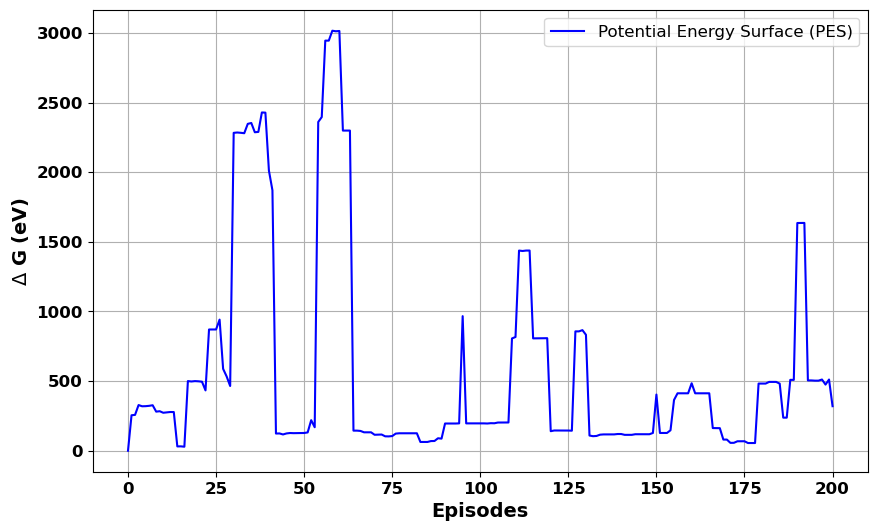

In [1]:
import os
from pathlib import Path
from ase.io import Trajectory, write
from asap3 import EMT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def process_trajectory(fname, cif=True):
    """
    Process a trajectory file to calculate and plot the Potential Energy Surface (PES).

    Args:
        fname (str): Path to the trajectory file.
        cif (bool): Whether to save configurations as CIF files.
    """
    # Load the trajectory
    traj = Trajectory(fname)
    print(f"Number of frames in trajectory: {len(traj)}")

    # Define the directory for CIF files
    cif_dir = os.path.join(os.path.dirname(fname), '../cifs/')
    Path(cif_dir).mkdir(parents=True, exist_ok=True)

    # Define the directory for plots
    plots_dir = os.path.join(os.path.dirname(fname), '../plots/')
    Path(plots_dir).mkdir(parents=True, exist_ok=True)

    # Define the directory for Excel files
    excel_dir = os.path.join(os.path.dirname(fname), '../excel/')
    Path(excel_dir).mkdir(parents=True, exist_ok=True)

    # Calculate energies
    initial_energy = None
    energies = []  # Store energies for all frames
    frames = []  # Store frame numbers
    for i, img in enumerate(traj):
        img.calc = EMT()
        if i == 0:
            initial_energy = img.get_potential_energy()
        
        ene = img.get_potential_energy() - initial_energy
        energies.append(ene)
        frames.append(i)
        print(f"Frame {i}: Energy difference = {ene:.4f} eV")

        # Save the frame as a CIF file if requested
        if cif:
            cif_fname = os.path.join(
                cif_dir,
                f"{Path(fname).stem}_frame_{str(i).zfill(3)}_{ene:.4f}.cif"
            )
            write(cif_fname, img, format='cif')

    # Create a DataFrame to store frame vs energy difference data
    data = {'Frame': frames, 'Energy Difference (eV)': energies}
    df = pd.DataFrame(data)


    ##### Save the DataFrame to an Excel file
    excel_fname = os.path.join(excel_dir, 'PdAgNiPt-PES_before_stable_policy.xlsx')
    df.to_excel(excel_fname, index=False)
    print(f"Frame vs Energy difference data saved to {excel_fname}")

    # Plot the Potential Energy Surface (PES)
    plt.figure(figsize=(10, 6))
    plt.plot(energies, label='Potential Energy Surface (PES)', color='blue')

    # Set xlabel and ylabel with size 14 and bold
    plt.xlabel('Episodes', fontsize=14, fontweight='bold')
    plt.ylabel('$\Delta$ G (eV)', fontsize=14, fontweight='bold')

    # Set tick labels with size 12 and bold
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    #plt.title('Potential Energy Surface (PES)', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True)


    ###### Save the PES plot
    pes_plot_filename = os.path.join(plots_dir, 'PdAgNiPt-PES_before_stable_policy.png')
    plt.savefig(pes_plot_filename, dpi=600, bbox_inches='tight')
    print(f"PES plot saved to {pes_plot_filename}")

    # Show the plot
    plt.show()



# Example usage
traj_fname = '../result_Pd3Ag3Ni3Au3/trajs/0_0.000000_8.881127_-2080.000000_0_0_2_full.traj'
process_trajectory(traj_fname, cif=True)

# Structures before the Stable Policy

In [2]:
import os
from ase.io import read, write

def convert_traj_to_xyz(traj_file_path, xyz_dir_path):
    # Read the trajectory file
    traj = read(traj_file_path, index=':')
    
    # Ensure the output directory exists
    if not os.path.exists(xyz_dir_path):
        os.makedirs(xyz_dir_path)
    
    # Loop over each frame in the trajectory and write to .xyz file
    for i, atoms in enumerate(traj):
        xyz_file_path = os.path.join(xyz_dir_path, f'frame_{i}.xyz')
        write(xyz_file_path, atoms, format='xyz')

# Specify the path to your .traj file
traj_file_path = '../result_Pd3Ag3Ni3Au3/trajs/0_0.000000_8.881127_-2080.000000_0_0_2_full.traj'

# Specify the directory where you want to save the .xyz files
xyz_dir_path = '../result_Pd3Ag3Ni3Au3/Structures_before_stable_policy_xyz'

# Call the function to perform the conversion
convert_traj_to_xyz(traj_file_path, xyz_dir_path)

# Potential Energy Surfaces after stable policy

Number of frames in trajectory: 7
Frame 0: Energy difference = 0.0000 eV
Frame 1: Energy difference = -1.1715 eV
Frame 2: Energy difference = -1.1691 eV
Frame 3: Energy difference = -1.2739 eV
Frame 4: Energy difference = -1.1656 eV
Frame 5: Energy difference = -1.1651 eV
Frame 6: Energy difference = -1.9251 eV
Frame vs Energy difference data saved to ../result_Pd3Ag3Ni3Au3/trajs/../excel/PdAgNiPt-PES_after_stable_policy.xlsx
PES plot saved to ../result_Pd3Ag3Ni3Au3/trajs/../plots/PdAgNiPt-PES_after_stable_policy.png


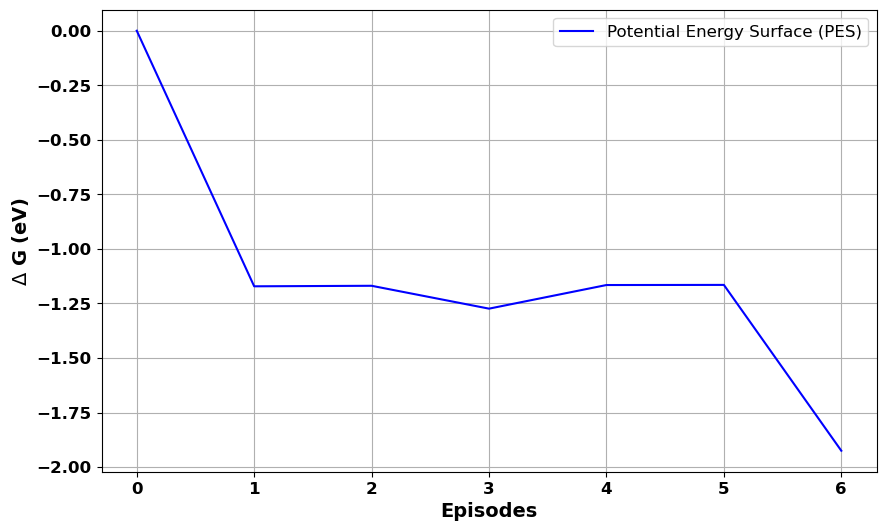

In [3]:
import os
from pathlib import Path
from ase.io import Trajectory, write
from asap3 import EMT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def process_trajectory(fname, cif=True):
    """
    Process a trajectory file to calculate and plot the Potential Energy Surface (PES).

    Args:
        fname (str): Path to the trajectory file.
        cif (bool): Whether to save configurations as CIF files.
    """
    # Load the trajectory
    traj = Trajectory(fname)
    print(f"Number of frames in trajectory: {len(traj)}")

    # Define the directory for CIF files
    cif_dir = os.path.join(os.path.dirname(fname), '../cifs/')
    Path(cif_dir).mkdir(parents=True, exist_ok=True)

    # Define the directory for plots
    plots_dir = os.path.join(os.path.dirname(fname), '../plots/')
    Path(plots_dir).mkdir(parents=True, exist_ok=True)

    # Define the directory for Excel files
    excel_dir = os.path.join(os.path.dirname(fname), '../excel/')
    Path(excel_dir).mkdir(parents=True, exist_ok=True)

    # Calculate energies
    initial_energy = None
    energies = []  # Store energies for all frames
    frames = []  # Store frame numbers
    for i, img in enumerate(traj):
        img.calc = EMT()
        if i == 0:
            initial_energy = img.get_potential_energy()
        
        ene = img.get_potential_energy() - initial_energy
        energies.append(ene)
        frames.append(i)
        print(f"Frame {i}: Energy difference = {ene:.4f} eV")

        # Save the frame as a CIF file if requested
        if cif:
            cif_fname = os.path.join(
                cif_dir,
                f"{Path(fname).stem}_frame_{str(i).zfill(3)}_{ene:.4f}.cif"
            )
            write(cif_fname, img, format='cif')

    # Create a DataFrame to store frame vs energy difference data
    data = {'Frame': frames, 'Energy Difference (eV)': energies}
    df = pd.DataFrame(data)


    ##### Save the DataFrame to an Excel file
    excel_fname = os.path.join(excel_dir, 'PdAgNiPt-PES_after_stable_policy.xlsx')
    df.to_excel(excel_fname, index=False)
    print(f"Frame vs Energy difference data saved to {excel_fname}")

    # Plot the Potential Energy Surface (PES)
    plt.figure(figsize=(10, 6))
    plt.plot(energies, label='Potential Energy Surface (PES)', color='blue')

    # Set xlabel and ylabel with size 14 and bold
    plt.xlabel('Episodes', fontsize=14, fontweight='bold')
    plt.ylabel('$\Delta$ G (eV)', fontsize=14, fontweight='bold')

    # Set tick labels with size 12 and bold
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    #plt.title('Potential Energy Surface (PES)', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True)


    ###### Save the PES plot
    pes_plot_filename = os.path.join(plots_dir, 'PdAgNiPt-PES_after_stable_policy.png')
    plt.savefig(pes_plot_filename, dpi=600, bbox_inches='tight')
    print(f"PES plot saved to {pes_plot_filename}")

    # Show the plot
    plt.show()


# Example usage
traj_fname = '../result_Pd3Ag3Ni3Au3/trajs/11060_-0.797848_8.881127_1058.959338_6_5_26_full.traj'
process_trajectory(traj_fname, cif=True)

# Structures after the Stable Policy

In [4]:
import os
from ase.io import read, write

def convert_traj_to_xyz(traj_file_path, xyz_dir_path):
    # Read the trajectory file
    traj = read(traj_file_path, index=':')
    
    # Ensure the output directory exists
    if not os.path.exists(xyz_dir_path):
        os.makedirs(xyz_dir_path)
    
    # Loop over each frame in the trajectory and write to .xyz file
    for i, atoms in enumerate(traj):
        xyz_file_path = os.path.join(xyz_dir_path, f'frame_{i}.xyz')
        write(xyz_file_path, atoms, format='xyz')

# Specify the path to your .traj file
traj_file_path = '../result_Pd3Ag3Ni3Au3/trajs/11060_-0.797848_8.881127_1058.959338_6_5_26_full.traj'

# Specify the directory where you want to save the .xyz files
xyz_dir_path = '../result_Pd3Ag3Ni3Au3/Structures_after_stable_policy_xyz'

# Call the function to perform the conversion
convert_traj_to_xyz(traj_file_path, xyz_dir_path)

# Potential Energy Surfaces for 25 unique low energy structures

Number of frames in trajectory: 25
Frame 0: Energy difference = 0.0000 eV
Frame 1: Energy difference = 0.0078 eV
Frame 2: Energy difference = 0.0087 eV
Frame 3: Energy difference = 0.0112 eV
Frame 4: Energy difference = 0.0131 eV
Frame 5: Energy difference = 0.0139 eV
Frame 6: Energy difference = 0.0140 eV
Frame 7: Energy difference = 0.0144 eV
Frame 8: Energy difference = 0.0146 eV
Frame 9: Energy difference = 0.0168 eV
Frame 10: Energy difference = 0.0174 eV
Frame 11: Energy difference = 0.0179 eV
Frame 12: Energy difference = 0.0180 eV
Frame 13: Energy difference = 0.0180 eV
Frame 14: Energy difference = 0.0191 eV
Frame 15: Energy difference = 0.0202 eV
Frame 16: Energy difference = 0.0217 eV
Frame 17: Energy difference = 0.0218 eV
Frame 18: Energy difference = 0.0219 eV
Frame 19: Energy difference = 0.0221 eV
Frame 20: Energy difference = 0.0231 eV
Frame 21: Energy difference = 0.0235 eV
Frame 22: Energy difference = 0.0237 eV
Frame 23: Energy difference = 0.0244 eV
Frame 24: Energ

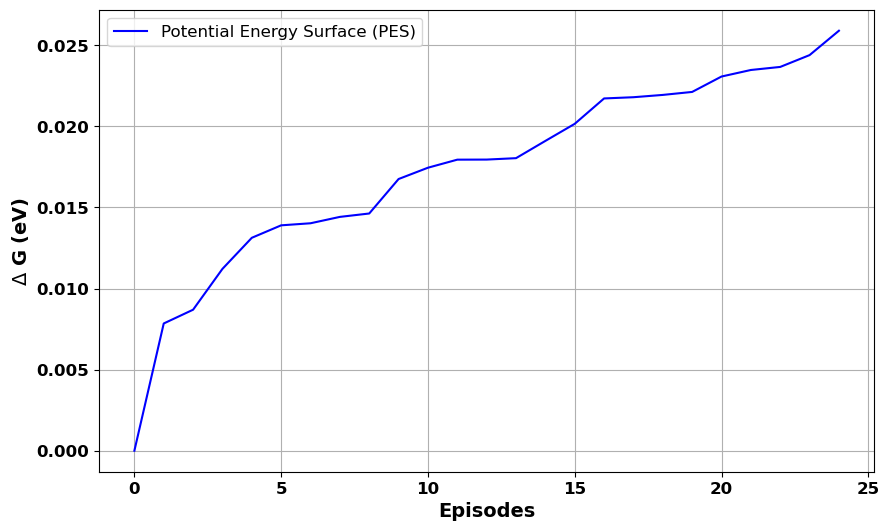

In [5]:
import os
from pathlib import Path
from ase.io import Trajectory, write
from asap3 import EMT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def process_trajectory(fname, cif=True):
    """
    Process a trajectory file to calculate and plot the Potential Energy Surface (PES).

    Args:
        fname (str): Path to the trajectory file.
        cif (bool): Whether to save configurations as CIF files.
    """
    # Load the trajectory
    traj = Trajectory(fname)
    print(f"Number of frames in trajectory: {len(traj)}")

    # Define the directory for CIF files
    cif_dir = os.path.join(os.path.dirname(fname), '../cifs/')
    Path(cif_dir).mkdir(parents=True, exist_ok=True)

    # Define the directory for plots
    plots_dir = os.path.join(os.path.dirname(fname), '../plots/')
    Path(plots_dir).mkdir(parents=True, exist_ok=True)

    # Define the directory for Excel files
    excel_dir = os.path.join(os.path.dirname(fname), '../excel/')
    Path(excel_dir).mkdir(parents=True, exist_ok=True)

    # Calculate energies
    initial_energy = None
    energies = []  # Store energies for all frames
    frames = []  # Store frame numbers
    for i, img in enumerate(traj):
        img.calc = EMT()
        if i == 0:
            initial_energy = img.get_potential_energy()
        
        ene = img.get_potential_energy() - initial_energy
        energies.append(ene)
        frames.append(i)
        print(f"Frame {i}: Energy difference = {ene:.4f} eV")

        # Save the frame as a CIF file if requested
        if cif:
            cif_fname = os.path.join(
                cif_dir,
                f"{Path(fname).stem}_frame_{str(i).zfill(3)}_{ene:.4f}.cif"
            )
            write(cif_fname, img, format='cif')

    # Create a DataFrame to store frame vs energy difference data
    data = {'Frame': frames, 'Energy Difference (eV)': energies}
    df = pd.DataFrame(data)


    ##### Save the DataFrame to an Excel file
    excel_fname = os.path.join(excel_dir, 'PdAgNiPt-PES_after_stable_policy.xlsx')
    df.to_excel(excel_fname, index=False)
    print(f"Frame vs Energy difference data saved to {excel_fname}")

    # Plot the Potential Energy Surface (PES)
    plt.figure(figsize=(10, 6))
    plt.plot(energies, label='Potential Energy Surface (PES)', color='blue')

    # Set xlabel and ylabel with size 14 and bold
    plt.xlabel('Episodes', fontsize=14, fontweight='bold')
    plt.ylabel('$\Delta$ G (eV)', fontsize=14, fontweight='bold')

    # Set tick labels with size 12 and bold
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    #plt.title('Potential Energy Surface (PES)', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True)


    ###### Save the PES plot
    pes_plot_filename = os.path.join(plots_dir, 'Unique_low_energy-PES.png')
    plt.savefig(pes_plot_filename, dpi=600, bbox_inches='tight')
    print(f"PES plot saved to {pes_plot_filename}")

    # Show the plot
    plt.show()


# Example usage
traj_fname = '../result_Pd3Ag3Ni3Au3/unique_low_images.traj'
process_trajectory(traj_fname, cif=True)

# 25 Unique low energy Structures

In [6]:
import os
from ase.io import read, write

def convert_traj_to_xyz(traj_file_path, xyz_dir_path):
    # Read the trajectory file
    traj = read(traj_file_path, index=':')
    
    # Ensure the output directory exists
    if not os.path.exists(xyz_dir_path):
        os.makedirs(xyz_dir_path)
    
    # Loop over each frame in the trajectory and write to .xyz file
    for i, atoms in enumerate(traj):
        xyz_file_path = os.path.join(xyz_dir_path, f'frame_{i}.xyz')
        write(xyz_file_path, atoms, format='xyz')

# Specify the path to your .traj file
traj_file_path = '../result_Pd3Ag3Ni3Au3/unique_low_images.traj'

# Specify the directory where you want to save the .xyz files
xyz_dir_path = '../result_Pd3Ag3Ni3Au3/unique_low_structures_xyz'

# Call the function to perform the conversion
convert_traj_to_xyz(traj_file_path, xyz_dir_path)